### Derive the expression for $v$ below Equation (21)
\begin{align*}
    v &= \frac{dE}{dk} \\
      &= \frac{d}{dk} \sqrt{k^2 c^2 + m_{e}^{2}c^4} \\
      &= \frac{1}{2} (k^2 c^2 + m_{e}^{2}c^4)^{-\frac{1}{2}} (2c^2k) \\
      &= \frac{c^2k}{(k^2 c^2 + m_{e}^{2}c^4)^{\frac{1}{2}}} \\
      &= \frac{kc^2}{E}
\end{align*}

## Three Cases for EOS

1. When $k_F \ll m_e c$, the kinetic energy is much smaller than the rest mass of the electrons. This is the non-relativistic case.
2. When $k_F \gg m_e c$, the kinetic energy is much greater than the rest mass of the electrons. This is the relativistic case.
3. When the compact stars are treated as relativistic pure electron Fermi gas. The energy density coming from electron
dominate. Also $k_F \gg m_e$. This is the ultra-relativistic case.

## Reproduce Figure (1)

I tried to solve the coupled differential equation (58) and (60). The solver won't finish.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.constants import pi
from scipy.integrate import solve_ivp

In [2]:
# constants
G = 6.67259e-8
c = 2.997924562e10
m_e = 9.1095e-28
solar_mass = 1.98847e33
hbar = 6.6261e-27
m_n = 1.674920e-24

r_0 = G * solar_mass / c**2
gamma_nr = 5/3
p_0_nr = 2.33002e22 # dyne/cm^2
k_nr = hbar**2 / (15*pi**2 * m_e) * ( 3*pi**2 / (m_n * c**2 * 2) )**gamma_nr

In [14]:
p_factor = r_0 / k_nr**(1/gamma_nr)

def eos(t, y):
    p = y[0]
    m = y[1]
    
    dp_dr = - p_factor * p**(1/gamma_nr) * m / t**2
    dm_dr = 4 * pi * t**2 / (solar_mass * c**2) * (p/k_nr)**(1/gamma_nr)
    return [dp_dr, dm_dr]

In [19]:
r = np.linspace(0.0000001, 12000, 1000)

sol = solve_ivp(eos, [r[0], r[-1]], [p_0_nr, 0], dense_output=True)


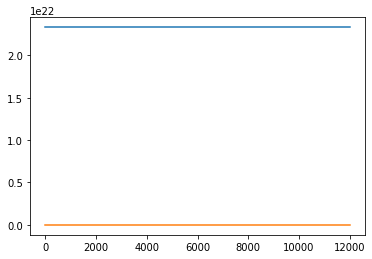

In [20]:
z = sol.sol(r)
plt.plot(r, z[0])
plt.plot(r, z[1])
plt.show()
